In [1]:
import zarr
import xarray as xr
import matplotlib.pyplot as plt
import gzip
import pickle
import numpy as np
from sympl import get_constant

Rd = get_constant('gas_constant_of_dry_air', 'J kg^-1 K^-1')
Cp =\
    get_constant('heat_capacity_of_dry_air_at_constant_pressure',
                 'J kg^-1 K^-1')
g=get_constant('gravitational_acceleration',
                 'm s^-2') 

/home/data/miniconda3/lib/python3.8/site-packages/sympl/_core/dataarray.py:6: FutureWarning: xarray subclass DataArray should explicitly define __slots__
  class DataArray(xr.DataArray):


In [2]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
mx=[]
for i in range(len(Rey[0])):
    
    st=heat_index[i][-2];end=heat_index[i][-1]
    
    tot=Rey[0][i][:,:7].sum(axis=1)+Rey[1][i][:,:7].sum(axis=1)+Rey[2][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    mx.append(np.max(np.cumsum(tot)))
    
    t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    tn=np.minimum(t, np.zeros(len(t)))
    int0.append(np.mean(np.cumsum(t))); dur0.append(-np.sum(tn))
    
    t=Rey[1][i][:,:7].sum(axis=1)
    tn=np.minimum(t, np.zeros(len(t)))
    int1.append(np.mean(np.cumsum(t))); dur1.append(-np.sum(tn))
    
    t=Rey[2][i][:,:7].sum(axis=1)
    tn=np.minimum(t, np.zeros(len(t)))
    int2.append(np.mean(np.cumsum(t))); dur2.append(-np.sum(tn))
    
    t=convfv[i][:,:7].sum(axis=1)
    tn=np.minimum(t, np.zeros(len(t)))
    int3.append(np.mean(np.cumsum(t))); dur3.append(-np.sum(tn))

1.16643275670953 4.599237859784912


<IPython.core.display.Javascript object>


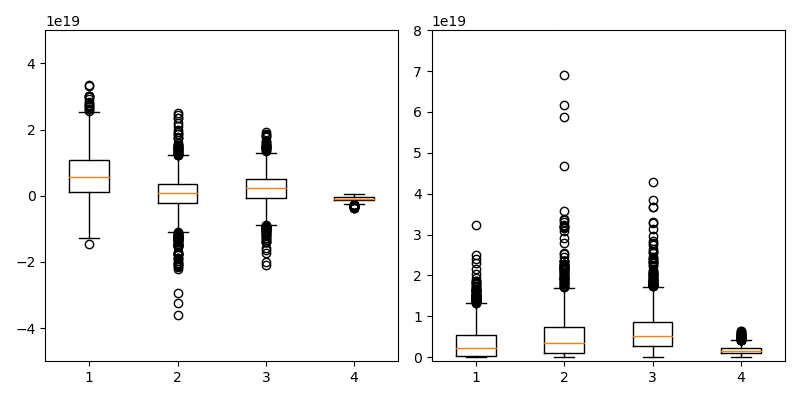

6.408382705772633e+18 3.61773064946257e+18
3.9379479920252506e+17 5.332205275673679e+18
2.0537378794038098e+18 6.340581387583755e+18
-9.332022376114817e+17 1.6947519923574638e+18
7.922713146767486e+18
1.6985269305077467e+19
1.2877089983852818e+19


In [3]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(8, 4)

ax[0].boxplot([int0, int1, int2, int3])
ax[0].set_ylim([-5e19,5e19])
ax[1].boxplot([dur0, dur1, dur2, dur3])
ax[1].set_ylim([-1e18,8e19])

print(np.mean(int0), np.mean(dur0))
print(np.mean(int1), np.mean(dur1))
print(np.mean(int2), np.mean(dur2))
print(np.mean(int3), np.mean(dur3))

print(np.mean(int0)+np.mean(int1)+np.mean(int2)+np.mean(int3))
print(np.mean(dur0)+np.mean(dur1)+np.mean(dur2)+np.mean(dur3))
print(np.mean(mx))

plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.tight_layout()

In [5]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv2', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv2', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv2', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv2', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv2', 'rb') as f:
    st=pickle.load(f)

int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
# print(np.mean(int_list), np.mean(dur_list))

cut=np.quantile(dur_list,[0,0.1,0.45,0.55,0.9,1])
    
int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
dur_sel=[]
for i in range(len(Rey[0])):
    if (dur_list[i]>=cut[4]  and dur_list[i]<=cut[5]):
        
        dur_sel.append(dur_list[i])
        
        t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
        int0.append(np.mean(np.cumsum(t))); dur0.append(np.mean(t))

        t=Rey[1][i][:,:7].sum(axis=1)
        int1.append(np.mean(np.cumsum(t))); dur1.append(np.mean(t))

        t=Rey[2][i][:,:7].sum(axis=1)
        int2.append(np.mean(np.cumsum(t))); dur2.append(np.mean(t))
    
#     t=Rey[3][i][:,:7].sum(axis=1)
#     int3.append(np.mean(np.cumsum(t))); dur3.append(np.mean(t))

print(np.mean(dur_sel))

10.028988368028708


<IPython.core.display.Javascript object>


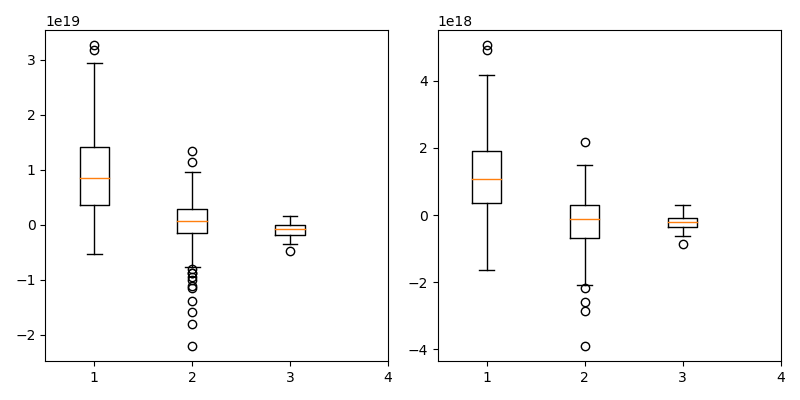

9.748417344682308e+18 1.200306137491254e+18
2.181562407023841e+17 -1.9249849142055066e+17
-9.460787052257164e+17 -2.1209957683364294e+17


In [6]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(8, 4)

ax[0].boxplot([int0, int1, int2])
ax[1].boxplot([dur0, dur1, dur2])

print(np.mean(int0), np.mean(dur0))
print(np.mean(int1), np.mean(dur1))
print(np.mean(int2), np.mean(dur2))
# print(np.mean(int3), np.mean(dur3))

plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.tight_layout()

In [25]:
## 0.3, 0.4, 0.3

%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)
    
int_list=[]
dur_list=[]
for i in range(len(heat_index)):
    
    int_list.append(heat_index[i][3])
    dur_list.append(heat_index[i][4])
    
print(np.mean(int_list), np.mean(dur_list))

int0=[];dur0=[]
int1=[];dur1=[]
int2=[];dur2=[]
int3=[];dur3=[]
for i in range(len(Rey[0])):
    
    st=heat_index[i][-2];end=heat_index[i][-1]
    dur_weight=np.ones(len(Rey[0][i])-1); dur_weight[0]=st;dur_weight[-1]=end
    
    t=Rey[0][i][:,:7].sum(axis=1)+Rey[3][i][:,:7].sum(axis=1)
    t=(t[1:]+t[:-1])/2
    t[0]=t[0]*st;t[-1]=t[-1]*st
    cmsum=np.insert(np.cumsum(t),0,0)
    int0.append(np.average((cmsum[1:]+cmsum[:-1])/2,weights=dur_weight))
    dur0.append(np.average(t,weights=dur_weight))
    
    t=Rey[1][i][:,:7].sum(axis=1)
    t=(t[1:]+t[:-1])/2
    t[0]=t[0]*st;t[-1]=t[-1]*st
    cmsum=np.insert(np.cumsum(t),0,0)
    int1.append(np.average((cmsum[1:]+cmsum[:-1])/2,weights=dur_weight))
    dur1.append(np.average(t,weights=dur_weight))
    
    t=Rey[2][i][:,:7].sum(axis=1)
    t=(t[1:]+t[:-1])/2
    t[0]=t[0]*st;t[-1]=t[-1]*st
    cmsum=np.insert(np.cumsum(t),0,0)
    int2.append(np.average((cmsum[1:]+cmsum[:-1])/2,weights=dur_weight))
    dur2.append(np.average(t,weights=dur_weight))
    
#     t=Rey[3][i][:,:7].sum(axis=1)
#     int3.append(np.mean(np.cumsum(t))); dur3.append(np.mean(t))

1.16643275670953 4.599237859784912


<IPython.core.display.Javascript object>


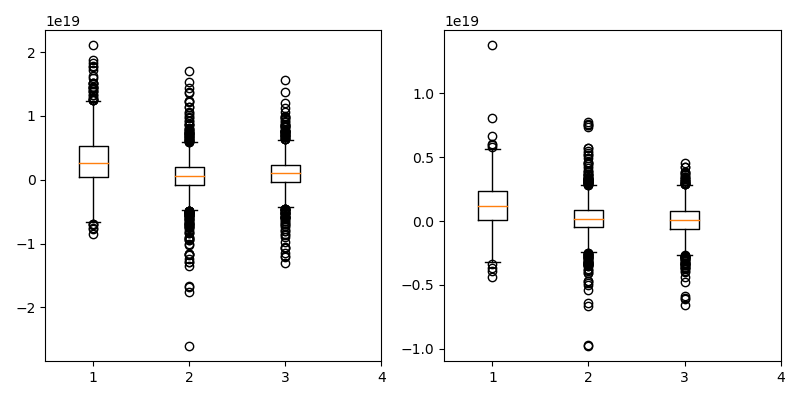

3.1019775773986463e+18 1.2706558651253576e+18
4.835183816013937e+17 1.8711915516729632e+17
9.538132197273878e+17 3.696101889887744e+16


In [26]:
fig, ax = plt.subplots(1, 2, sharex=True, sharey=False)
fig.set_size_inches(8, 4)

ax[0].boxplot([int0, int1, int2])
ax[1].boxplot([dur0, dur1, dur2])

print(np.mean(int0), np.mean(dur0))
print(np.mean(int1), np.mean(dur1))
print(np.mean(int2), np.mean(dur2))
# print(np.mean(int3), np.mean(dur3))

plt.xticks([1, 2, 3, 4], ['1', '2', '3', '4'])
plt.tight_layout()

In [16]:
%matplotlib notebook
import seaborn as sns
import scipy.stats
from scipy import interpolate

# fig, ax = plt.subplots(2, 2, sharex=True, sharey=True)
# fig.set_size_inches(7, 7)

p_std = np.arange(0.1, 9.9 ,0.2)[::-1]*10000

with gzip.open('/home/scratch/Abel_data/heat_indexv1', 'rb') as f:
    heat_index= pickle.load(f)

with gzip.open('/home/scratch/Abel_data/Conv_datv1', 'rb') as f:
    convfh,convfv=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/rey_datv1', 'rb') as f:
    Rey=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_prioriv1', 'rb') as f:
    prio=pickle.load(f)
with gzip.open('/home/scratch/Abel_data/Conv_startv1', 'rb') as f:
    st=pickle.load(f)

res=[]
res1=[]
for i in range(len(convfh)):
    
    t=convfh[i][1:,:7].sum(axis=1)
    res.append(np.sum(t))
    
    t=convfh[i][1:,:7].sum(axis=1)+convfv[i][1:,:7].sum(axis=1)
    res1.append(np.sum(t))
    
print(res)

[3.340614017288867e+18, 2.8287008288810476e+18, 4.2467864580409754e+17, -3.2159433946520576e+18, 6.528636229335738e+18, -4.64511045474298e+18, -3.3322448708447273e+18, 2.2884501367050043e+18, -5.56782123605537e+18, -9.229435303386712e+18, -2.151373625472255e+18, 8.080459629833687e+17, 8.693364575819352e+18, -1.5814699916418042e+19, 3.6068512050837893e+18, 7.050226766339651e+18, -5.23499844037241e+18, 6.772669053120815e+18, 5.990272996354775e+17, -7.739511409912869e+18, 6.243765851611479e+18, -6.984794784037859e+18, -2.476229392774023e+18, -2.581687382262351e+18, -3.0810474081923645e+18, 2.378289937228896e+18, 7.687423929822618e+18, 3.3982046333154836e+18, -1.8934478454656978e+18, 3.162335311546407e+18, -9.257645146929658e+18, -5.715615611973169e+18, -4.059222563377059e+18, -8.605733688349008e+18, 3.902936647533589e+18, -7.694485319287415e+18, 2.411486458546569e+18, -4.580485289904209e+18, -1.498351244043772e+18, -1.5392863986872216e+19, -9.99078369431534e+18, -8.88097790242975e+18, -5.

<IPython.core.display.Javascript object>


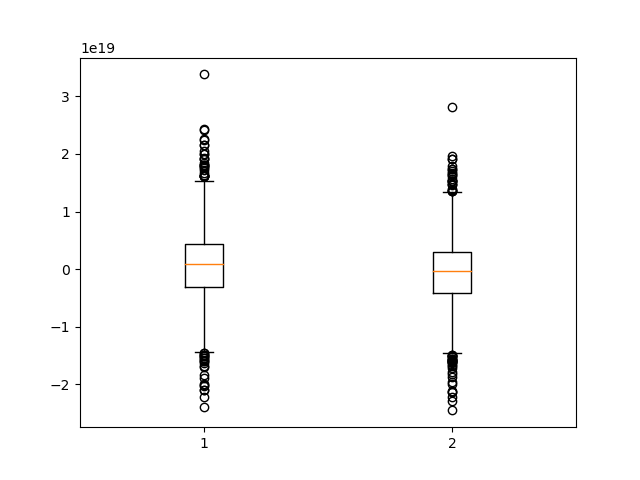

6.74565666305833e+17
-7.016564611497582e+17


In [17]:
plt.boxplot([res, res1])

print(np.mean(res))
print(np.mean(res1))

# plt.xticks([1, 2, 3, 4, 5], ['Total', 'u_mean', 'u_anom', 'v.dse_mean', 'v.dse_anom'])
# plt.tight_layout()